# SAT Scores: Observations
This project was the first that we were given in Data Science Immersive course. The data set includes the SAT score results for 2001 across 52 states with a split between verbal and math tests. The project was mostly focused on exploratory data analysis and our ability to build inferences from the given data. 

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv("../data/sat_scores.csv")
print df.shape
df.head()

(52, 4)


,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


##### 1. What does the data describe?

The data set is 52 observations with four features:
 - State
 - Rate as percentage of students taking the SAT test
 - SAT scrore for verbal exam
 - SAT score for math exam

##### 2. Does the data look complete? Are there any obvious issues with the observations?

In [53]:
df[df.isnull() != False].count()

State     0
Rate      0
Verbal    0
Math      0
dtype: int64

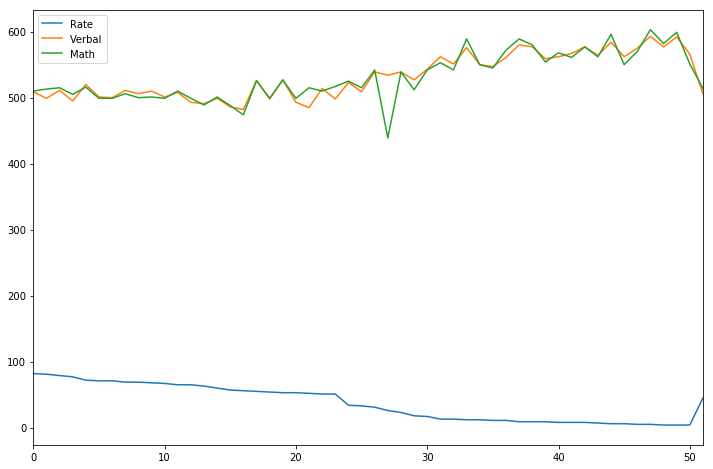

In [54]:
df.plot(figsize=(12,8))
plt.show()

### Observation
As we may see the Verbal and Math scores are in agreement with each other. This is intuitively expected. I will give it another look on a scatter plot below. Before that I will add another column with the total score Math + Verbal

In [55]:
df['Total'] =  df['Verbal'] + df['Math']

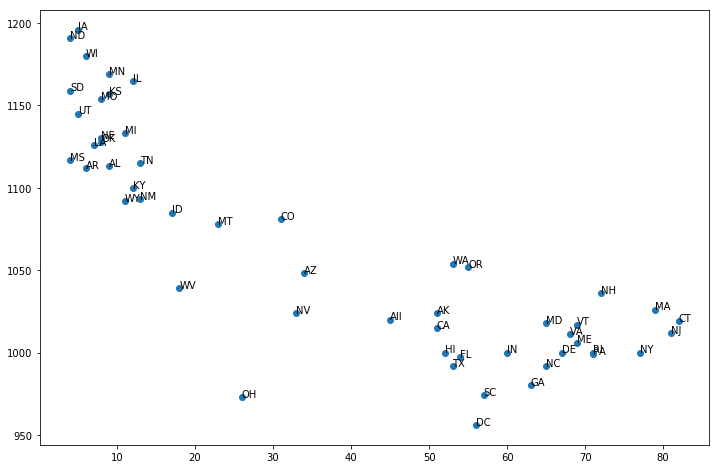

In [56]:
z = df.Rate
y = df.Total
n = df.State
fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i],y[i]))
plt.show()

It looks like the higher rate of students taking the test, the lower average result is in the state. Under futher investigation it became clear that those states are mostly on the shores and SAT is better presented in those states. However, in the states with lower rates of participation, students take the test if they wanted to apply for schools that require SAT to enter. That's why the average level of SAT score is higher.

##### 3. Describe in words what each variable(column) is.

There are five columns of data:
    - US State coded to two letters,
    - Rate - unclear at this moment, but at this moment 
        I suppose it is rate of high school seniors taking exam
    - mean SAT verbal exam score for each state
    - mean SAT math exam score for each state
    - SAT overall exam score for each state''' 

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [57]:
import csv
data =[]
print 'Opening File. Data: '
print ''
with open('../data/sat_scores.csv', 'rU') as f:
    reader = csv.reader(f)
    for row in reader:
        data.append(row)
f.close()
print data[0:10]
print 'file closed'

Opening File. Data: 

[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500']]
file closed


##### 5. Print the data

In [58]:
data[0:len(data)][0]

['State', 'Rate', 'Verbal', 'Math']

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [59]:
'''SO DO NOT TRY TO RUN THIS CODE SEVERAL TIMES. Because it would be moving the top line of the data to the header
    and cutting the data by one line. I is understood that this part would be a part of a longer code'''
header = data[0]
print header
data.remove(header)
print data[0:5]
if len(data)<52:
    print"Run this code again from the top of page" 
#In case you re-run this code and len(data) is below 52, then go to top and re-run the code for the whole page'''

['State', 'Rate', 'Verbal', 'Math']
[['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516']]


##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [60]:
#I think I did not get the idea of what the hint was about. So I just decided, I would extract every fourth item
#in the list of lists.
states = []
rates = []
sat_verb = []
sat_math = []
item = 0
for item in range(len(data)-1):
    states += data[item][0::4]
    rates += data[item][1::4]
    sat_verb +=data[item][2::4]
    sat_math +=data[item][3::4]

print states[:10]
print rates[:10]
print sat_verb[:10]
print sat_math[:10]
len(row)

['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA']
['82', '81', '79', '77', '72', '71', '71', '69', '69', '68']
['509', '499', '511', '495', '520', '501', '500', '511', '506', '510']
['510', '513', '515', '505', '516', '499', '499', '506', '500', '501']


4


##### 8. Print the types of each column

In [61]:
print type(rates[0])
print type (sat_verb[0]) 
print type (sat_math[0])



<type 'str'>
<type 'str'>
<type 'str'>


##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [62]:
for i in range(len(data)-1):
    rates[i] = float(rates[i])
    sat_verb[i] = float(sat_verb[i])
    sat_math[i] = float(sat_math[i])
print rates[:10]
print sat_verb[:10]
print sat_math[:10]

[82.0, 81.0, 79.0, 77.0, 72.0, 71.0, 71.0, 69.0, 69.0, 68.0]
[509.0, 499.0, 511.0, 495.0, 520.0, 501.0, 500.0, 511.0, 506.0, 510.0]
[510.0, 513.0, 515.0, 505.0, 516.0, 499.0, 499.0, 506.0, 500.0, 501.0]


##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [63]:
rates_dict = dict(zip(states, rates))
sat_verb_dict = dict(zip(states, sat_verb))
sat_math_dict = dict(zip(states, sat_math))
print rates_dict
print sat_verb_dict
print sat_math_dict

{'WA': 53.0, 'DE': 67.0, 'DC': 56.0, 'WI': 6.0, 'WV': 18.0, 'HI': 52.0, 'FL': 54.0, 'WY': 11.0, 'NH': 72.0, 'NJ': 81.0, 'NM': 13.0, 'TX': 53.0, 'LA': 7.0, 'NC': 65.0, 'ND': 4.0, 'NE': 8.0, 'TN': 13.0, 'NY': 77.0, 'PA': 71.0, 'RI': 71.0, 'NV': 33.0, 'VA': 68.0, 'CO': 31.0, 'AK': 51.0, 'AL': 9.0, 'AR': 6.0, 'VT': 69.0, 'IL': 12.0, 'GA': 63.0, 'IN': 60.0, 'IA': 5.0, 'OK': 8.0, 'AZ': 34.0, 'CA': 51.0, 'ID': 17.0, 'CT': 82.0, 'ME': 69.0, 'MD': 65.0, 'MA': 79.0, 'OH': 26.0, 'UT': 5.0, 'MO': 8.0, 'MN': 9.0, 'MI': 11.0, 'KS': 9.0, 'MT': 23.0, 'MS': 4.0, 'SC': 57.0, 'KY': 12.0, 'OR': 55.0, 'SD': 4.0}
{'WA': 527.0, 'DE': 501.0, 'DC': 482.0, 'WI': 584.0, 'WV': 527.0, 'HI': 485.0, 'FL': 498.0, 'WY': 547.0, 'NH': 520.0, 'NJ': 499.0, 'NM': 551.0, 'TX': 493.0, 'LA': 564.0, 'NC': 493.0, 'ND': 592.0, 'NE': 562.0, 'TN': 562.0, 'NY': 495.0, 'PA': 500.0, 'RI': 501.0, 'NV': 509.0, 'VA': 510.0, 'CO': 539.0, 'AK': 514.0, 'AL': 559.0, 'AR': 562.0, 'VT': 511.0, 'IL': 576.0, 'GA': 491.0, 'IN': 499.0, 'IA': 593.

##### 11. Create a dictionary with the values for each of the numeric columns

## Step 3: Describe the data

##### 12. Print the min and max of each column

In [64]:
print 'Minimum rate of college-bound high school students is in ', min(rates_dict, key=rates_dict.get),  rates_dict[min(rates_dict, key=rates_dict.get)]
print 'Maximum rate of college-bound high school students is in ', max(rates_dict, key=rates_dict.get),  rates_dict[max(rates_dict, key=rates_dict.get)]
print 'Minimum Verbal Score among students is in ', min(sat_verb_dict, key=sat_verb_dict.get),  sat_verb_dict[min(sat_verb_dict, key=sat_verb_dict.get)]
print 'Maximum Verbal Score among students is in ', max(sat_verb_dict, key=sat_verb_dict.get),  sat_verb_dict[max(sat_verb_dict, key=sat_verb_dict.get)]
print 'Minimum Math Score among students is in ', min(sat_math_dict, key=sat_math_dict.get),  sat_math_dict[min(sat_math_dict, key=sat_math_dict.get)]
print 'Maximum Math Score among students is in ', max(sat_math_dict, key=sat_math_dict.get),  sat_math_dict[max(sat_math_dict, key=sat_math_dict.get)]

Minimum rate of college-bound high school students is in  ND 4.0
Maximum rate of college-bound high school students is in  CT 82.0
Minimum Verbal Score among students is in  DC 482.0
Maximum Verbal Score among students is in  IA 593.0
Minimum Math Score among students is in  OH 439.0
Maximum Math Score among students is in  IA 603.0


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [65]:
# Here is a function and it's calculations, just to assure that 
# I wrote them rigth below is the calculations done with help of numpy package.

def std_list(datalist):
    return (sum([(sum(datalist)/len(datalist) - datalist[i])**2 for i in range(len(datalist))])/len(datalist))**.5

print 'Standard deviation of rates of CBHS-students in US is ', std_list(rates)
print 'Standard deviation of verbal SAT test of CBHS-students in US is ', std_list(sat_verb)
print 'Standard deviation of math SAT test of CBHS-students in US is ', std_list(sat_math)

Standard deviation of rates of CBHS-students in US is  27.2792386761
Standard deviation of verbal SAT test of CBHS-students in US is  33.0319826842
Standard deviation of math SAT test of CBHS-students in US is  35.9298731731


In [66]:
import numpy as np
print 'Standard deviation of rates of CBHS-students in US is ', np.std(rates_dict.values())
print 'Standard deviation of verbal SAT test of CBHS-students in US is ', np.std(sat_verb_dict.values())
print 'Standard deviation of math SAT test of CBHS-students in US is ', np.std(sat_math_dict.values())

Standard deviation of rates of CBHS-students in US is  27.2792386761
Standard deviation of verbal SAT test of CBHS-students in US is  33.0319826842
Standard deviation of math SAT test of CBHS-students in US is  35.9298731731


## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

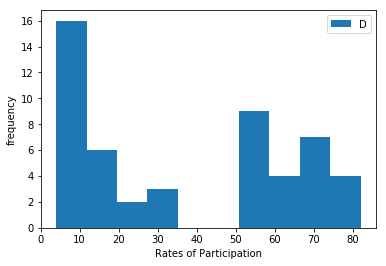

In [67]:
import matplotlib.pyplot as plt

_ = plt.hist(rates, bins = 10)
_ = plt.xlabel('Rates of Participation')
_ = plt.ylabel('frequency')
_ = plt.legend('Distribution of Rates of Test Participation')
plt.show()

##### 15. Plot the Math(s) distribution

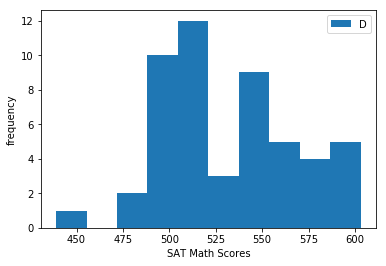

In [68]:
import matplotlib.pyplot as plt

_ = plt.hist(sat_math, bins = 10)
_ = plt.xlabel('SAT Math Scores')
_ = plt.ylabel('frequency')
_ = plt.legend('Distribution of SAT Math scores USA')
plt.show()

##### 16. Plot the Verbal distribution

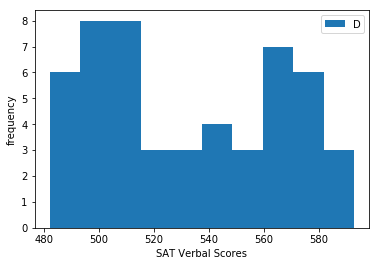

In [69]:
import matplotlib.pyplot as plt

_ = plt.hist(sat_verb, bins = 10)
_ = plt.xlabel('SAT Verbal Scores')
_ = plt.ylabel('frequency')
_ = plt.legend('Distribution of SAT Verba scores USA')
plt.show()

##### 17. What is the typical assumption for data distribution?

In [70]:
# - That it would be normal

##### 18. Does that distribution hold true for our data?

In [71]:
# But it is not normal. It's rather a conjunction of two 
#normal distributions of those people who study and those who don't.

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

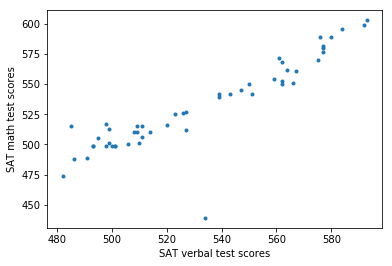

In [72]:
import matplotlib.pyplot as plt


_ = plt.plot(sat_verb, sat_math, marker = '.',linestyle ='None')
_ = plt.xlabel('SAT verbal test scores')
_ = plt.ylabel('SAT math test scores')

plt.show()

##### 20. Are there any interesting relationships to note?

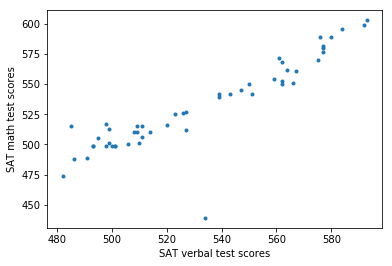

In [73]:
import matplotlib.pyplot as plt


_ = plt.plot(sat_verb, sat_math, marker = '.',linestyle ='None')
_ = plt.xlabel('SAT verbal test scores')
_ = plt.ylabel('SAT math test scores')

plt.show()

##### 21. Create box plots for each variable. 

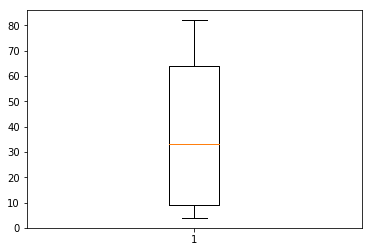

In [74]:
_ = plt.boxplot(rates, 0,'gD')
plt.show()

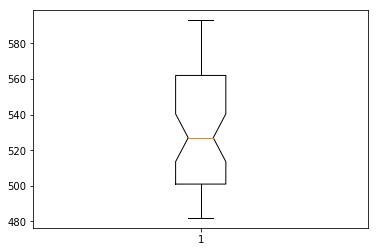

In [75]:
_ = plt.boxplot(sat_verb, 1)
plt.show()

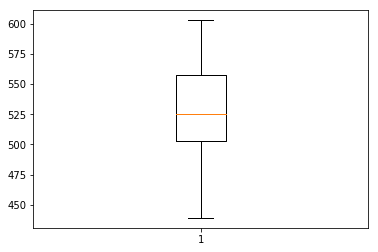

In [76]:
_ = plt.boxplot(sat_math,0)
plt.show()

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

In [77]:
# Here I am trying to open an image that I exported from Tableau
from IPython.core.display import Image
Image(url= "../images/Overview.png")